In [12]:
# Dependencies
import requests
import json
from pprint import pprint
import pandas as pd

In [13]:
# Collect data from FDIC API for each bank (From 2013 Q1 TO 2022 Q4)
chase_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628&fields=CERT%2CREPDTE%2CASSET%2CLNLSNET%2CDEPDOM&sort_by=CERT&sort_order=DESC&limit=40&offset=0&agg_by=REPDTE&agg_term_fields=CERT&agg_sum_fields=LNLSNET%2CDEPDOM&agg_limit=40&format=json&download=false&filename=data_file"
boa_url ="https://banks.data.fdic.gov/api/financials?filters=CERT%3A3510&fields=CERT%2CREPDTE%2CASSET%2CLNLSNET%2CDEPDOM&sort_by=CERT&sort_order=DESC&limit=40&offset=0&agg_by=REPDTE&agg_term_fields=CERT&agg_sum_fields=LNLSNET%2CDEPDOM&agg_limit=40&format=json&download=false&filename=data_file"
wf_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A3511&fields=CERT%2CREPDTE%2CASSET%2CLNLSNET%2CDEPDOM&sort_by=CERT&sort_order=DESC&limit=40&offset=0&agg_by=REPDTE&agg_term_fields=CERT&agg_sum_fields=LNLSNET%2CDEPDOM&agg_limit=40&format=json&download=false&filename=data_file"
gs_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A33124&fields=CERT%2CREPDTE%2CASSET%2CLNLSNET%2CDEPDOM&sort_by=CERT&sort_order=DESC&limit=40&offset=0&agg_by=REPDTE&agg_term_fields=CERT&agg_sum_fields=LNLSNET%2CDEPDOM&agg_limit=40&format=json&download=false&filename=data_file"
citi_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A7213&fields=CERT%2CREPDTE%2CASSET%2CLNLSNET%2CDEPDOM&sort_by=CERT&sort_order=DESC&limit=40&offset=0&agg_by=REPDTE&agg_term_fields=CERT&agg_sum_fields=LNLSNET%2CDEPDOM&agg_limit=40&format=json&download=false&filename=data_file"

In [14]:
# Create search query, make request and store in json
response_chase = requests.get(chase_url).json()
response_boa = requests.get(boa_url).json()
response_wf = requests.get(wf_url).json()
response_gs = requests.get(gs_url).json()
response_citi = requests.get(citi_url).json()

In [15]:
chase_data = response_chase["data"]
chase_data

[{'data': {'REPDTE': '20221231',
   'count': 1,
   'sum_LNLSNET': 1124240000,
   'sum_DEPDOM': 2014513000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20220930',
   'count': 1,
   'sum_LNLSNET': 1098891000,
   'sum_DEPDOM': 2079331000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20220630',
   'count': 1,
   'sum_LNLSNET': 1092851000,
   'sum_DEPDOM': 2128462000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20220331',
   'count': 1,
   'sum_LNLSNET': 1064330000,
   'sum_DEPDOM': 2201118000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20211231',
   'count': 1,
   'sum_LNLSNET': 1068728000,
   'sum_DEPDOM': 2152876000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20210930',
   'count': 1,
   'sum_LNLSNET': 1033034000,
   'sum_DEPDOM': 2091215000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20210630',
   'count': 1,
   'sum_LNLSNET': 1030222000,
   'sum_DEPDOM': 2011344000,
   'count_CERT_628': 1}},
 {'data': {'REPDTE': '20210331',
   'count': 1,
   'sum_LNLSNET': 100

In [5]:
# Create separate data frame of each bank for looping
chase_data = response_chase["data"]
boa_data = response_boa["data"]
wf_data = response_wf["data"]
gs_data = response_gs["data"]
citi_data = response_citi["data"]

In [6]:
# Zip all data into one object
combined_data = zip(chase_data,boa_data,wf_data,gs_data,citi_data)

# Set empty lists to hold all banks data
combined_list = []

# Loop through each character
for chase,boa,wf,gs,citi in combined_data:
    
    date = chase['data']['REPDTE']
    
    chase_depdom = chase['data']['sum_DEPDOM']
    boa_depdom = boa['data']['sum_DEPDOM']
    wf_depdom = wf['data']['sum_DEPDOM']
    gs_depdom = gs['data']['sum_DEPDOM']
    citi_depdom = citi['data']['sum_DEPDOM']
    
    chase_lnlsnet = chase['data']['sum_LNLSNET']
    boa_lnlsnet = boa['data']['sum_LNLSNET']
    wf_lnlsnet = wf['data']['sum_LNLSNET']
    gs_lnlsnet = gs['data']['sum_LNLSNET']
    citi_lnlsnet = citi['data']['sum_LNLSNET']
    
    combined_list.append({'Reporting Date': date,
                     'Chase Total Domestic Deposit': chase_depdom, 'BoA Total Domestic Deposit': boa_depdom,
                     'WF Total Domestic Deposit': wf_depdom, 'GS Total Domestic Deposit': gs_depdom,
                     'Citi Total Domestic Deposit': citi_depdom,
                     'Chase Net Loans and Leases': chase_lnlsnet,'BoA Net Loans and Leases': boa_lnlsnet,
                    'WF Net Loans and Leases': wf_lnlsnet,'GS Net Loans and Leases': gs_lnlsnet,
                     'Citi Net Loans and Leases': citi_lnlsnet
                    })
    
# Create DataFrame               
new_data = pd.DataFrame(combined_list)

#Chage data type of reporting date and sort the values in ascending orders
bank_data= new_data.astype({"Reporting Date":"datetime64"}).sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)

#banks_data.set_index('Reporting Date', inplace=True)

bank_data.head()

,Reporting Date,Chase Total Domestic Deposit,BoA Total Domestic Deposit,WF Total Domestic Deposit,GS Total Domestic Deposit,Citi Total Domestic Deposit,Chase Net Loans and Leases,BoA Net Loans and Leases,WF Net Loans and Leases,GS Net Loans and Leases,Citi Net Loans and Leases
0,2013-03-31,908489000,1039408000,932346000,67084000,428284000,608133000,750815000,764011000,15836000,572245000
1,2013-06-30,916543000,1019084000,924162000,65384000,438889000,604214000,769901000,763933000,16521000,577321000
2,2013-09-30,977298000,1041630000,960746000,64485000,439111000,609913000,779972000,767448000,19920000,586220000
3,2013-12-31,1004101000,1034845000,1000959000,64089000,451105000,619348000,772348000,776375000,22775000,590653000
4,2014-03-31,1007957000,1044900000,1010888000,64427000,453640000,617527000,765302000,780488000,24854000,591284000


In [7]:
# Read the original CSV file of consumer sentiment index
consumer_index = pd.read_csv("Resources/us_csi_original.csv")

# Display Consumer Index DataFrame
consumer_index.head(15)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,UMCSENT,"University of Michigan: Consumer Sentiment, In..."
7,NaN,NaN
8,Frequency: Quarterly,NaN
9,observation_date,UMCSENT


In [8]:
# Drop all unuseful rows and any missing information
cleaned_consumer_index= consumer_index.drop(consumer_index.iloc[0:10].index).dropna(how="any")

#Rename the header of column and reset index
renamed_consumer_index= cleaned_consumer_index.rename(columns = {"FRED Graph Observations" : "Reporting Date", "Unnamed: 1" : "Consumer Sentiment Index"}).reset_index(drop=True)
renamed_consumer_index.head()

,Reporting Date,Consumer Sentiment Index
0,2013-01-01,76.7
1,2013-04-01,81.7
2,2013-07-01,81.6
3,2013-10-01,76.9
4,2014-01-01,80.9


In [9]:
# Copy and add column "Consumer Sentiment Index" into the bank_data file on quarterly basis
bank_data['CSI'] = renamed_consumer_index['Consumer Sentiment Index'].copy()
bank_data.head()

,Reporting Date,Chase Total Domestic Deposit,BoA Total Domestic Deposit,WF Total Domestic Deposit,GS Total Domestic Deposit,Citi Total Domestic Deposit,Chase Net Loans and Leases,BoA Net Loans and Leases,WF Net Loans and Leases,GS Net Loans and Leases,Citi Net Loans and Leases,CSI
0,2013-03-31,908489000,1039408000,932346000,67084000,428284000,608133000,750815000,764011000,15836000,572245000,76.7
1,2013-06-30,916543000,1019084000,924162000,65384000,438889000,604214000,769901000,763933000,16521000,577321000,81.7
2,2013-09-30,977298000,1041630000,960746000,64485000,439111000,609913000,779972000,767448000,19920000,586220000,81.6
3,2013-12-31,1004101000,1034845000,1000959000,64089000,451105000,619348000,772348000,776375000,22775000,590653000,76.9
4,2014-03-31,1007957000,1044900000,1010888000,64427000,453640000,617527000,765302000,780488000,24854000,591284000,80.9


In [10]:
#Write bank data frame into CSV files
bank_data.to_csv("Output/bank_correlation.csv")

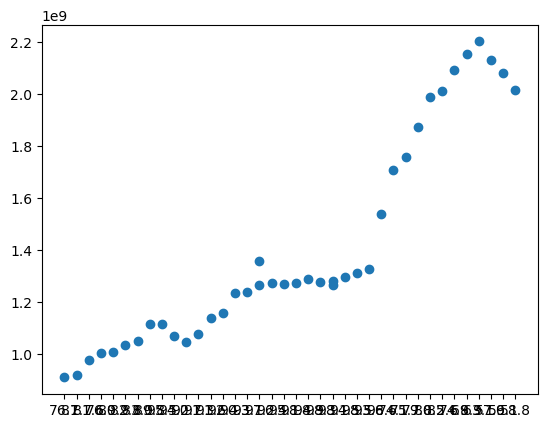

In [11]:
#Test for graph
from matplotlib import pyplot as plt
plt.scatter(bank_data["CSI"],bank_data["Chase Total Domestic Deposit"])
plt.show()

fig.ax (3,2)